# 6.5 Machine Learning - Clustering

### 1. Importing libraries and data
### 2. Data cleaning
### 3. The elbow technique
### 4. k-means Clustering

### 1. Importing libraries and data

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [30]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [31]:
# Set path

path = r'/Users/shaheirjibin/Documents/Data Analytics/02 Data Analytics Immersion/06 Advanced Analytics & Dashboard Design/Petrol stations in Germany'

In [32]:
# Import petrol stations in Germany dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'petrol_state.csv'))

### 2. Data cleaning

In [33]:
df.head()

,Unnamed: 0,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,year,month,diesel,e5,e10,state
0,0,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,1,1.814,1.766,1.706,Bayern
1,1,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,2,1.752,1.787,1.727,Bayern
2,2,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,3,1.723,1.813,1.753,Bayern
3,3,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,4,1.703,1.840,1.780,Bayern
4,4,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,53175,Bonn,50.6951,7.14276,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":31,""period...",2023,1,1.801,1.781,1.721,Nordrhein-Westfalen


In [34]:
# Drop column 'Unnamed: 0'

df.drop('Unnamed: 0', axis=1, inplace=True)

In [35]:
# Create a subset from the columns 'e10', 'e5' and 'diesel'

df_k = df[['e10', 'e5', 'diesel']]

In [36]:
# Remove all the 0 values in these columns

df_k = df_k.query('e10 != "0" and e5 != "0" and diesel != "0"')

In [37]:
# Remove any low and high outliers

df_k = df_k.query('e10 >= 1.5 and diesel >= 1.4 and e5 >= 1.5')
df_k = df_k.query('e10 < 2.6 and diesel < 2.6 and e5 < 2.6')

### 3. The elbow technique

In [38]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [39]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-1083.9874540805695,
 -420.2676362607134,
 -250.69697822666063,
 -187.2110016000014,
 -152.09388324698557,
 -129.24695332011794,
 -111.60715241978004,
 -95.9475706818839,
 -86.05885669402865]

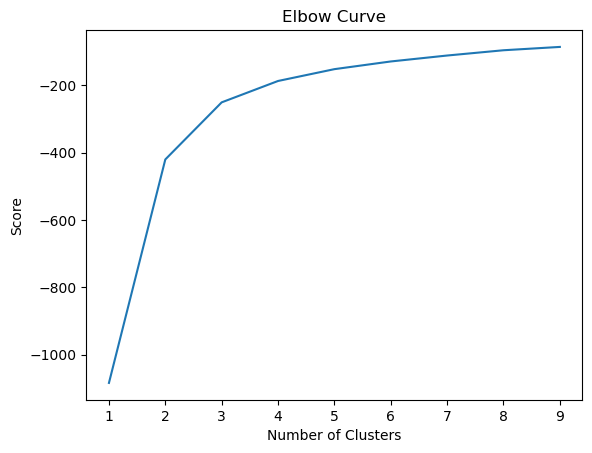

In [40]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from 2 to 3 but starting from 4, the line starts to plateau. Thus, the optimal count for my clusters is 4.

### 4. k-means clustering

In [41]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [42]:
# Fit the k-means object to the data.

kmeans.fit(df_k)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [43]:
df_k['clusters'] = kmeans.fit_predict(df_k)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
df_k.head()

,e10,e5,diesel,clusters
0,1.706,1.766,1.814,0
1,1.727,1.787,1.752,0
2,1.753,1.813,1.723,3
3,1.780,1.840,1.703,3
4,1.721,1.781,1.801,0


In [45]:
df_k['clusters'].value_counts()

clusters
2    18065
3    16633
0    16351
1     1154
Name: count, dtype: int64

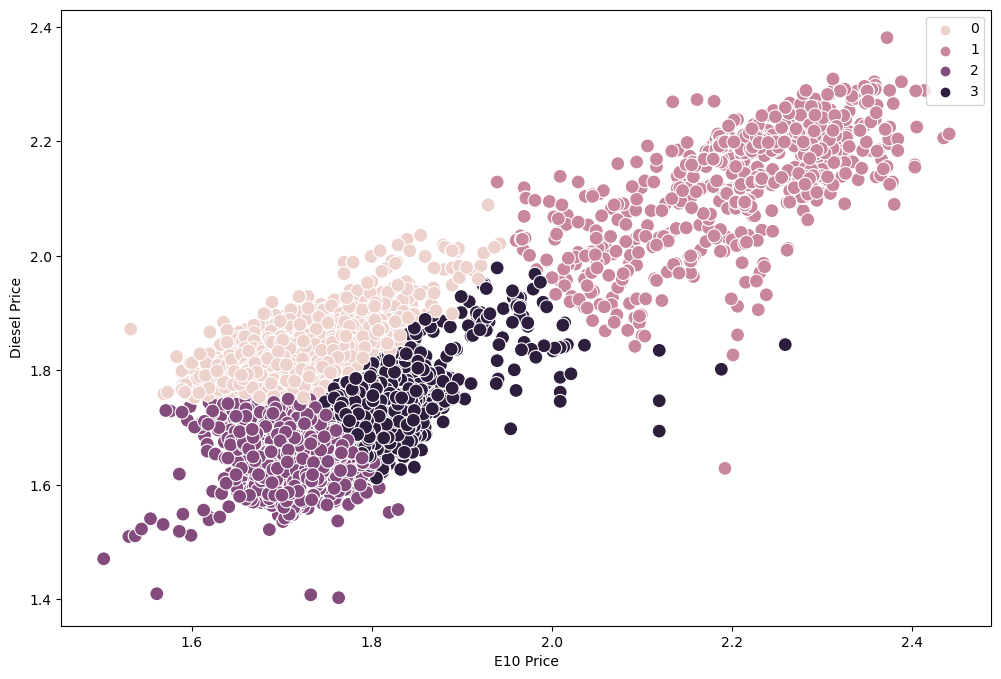

In [46]:
# Plot the clusters for the "e10" and "diesel" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['e10'], y=df_k['diesel'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('E10 Price') # Label x-axis.
plt.ylabel('Diesel Price') # Label y-axis.
plt.show()

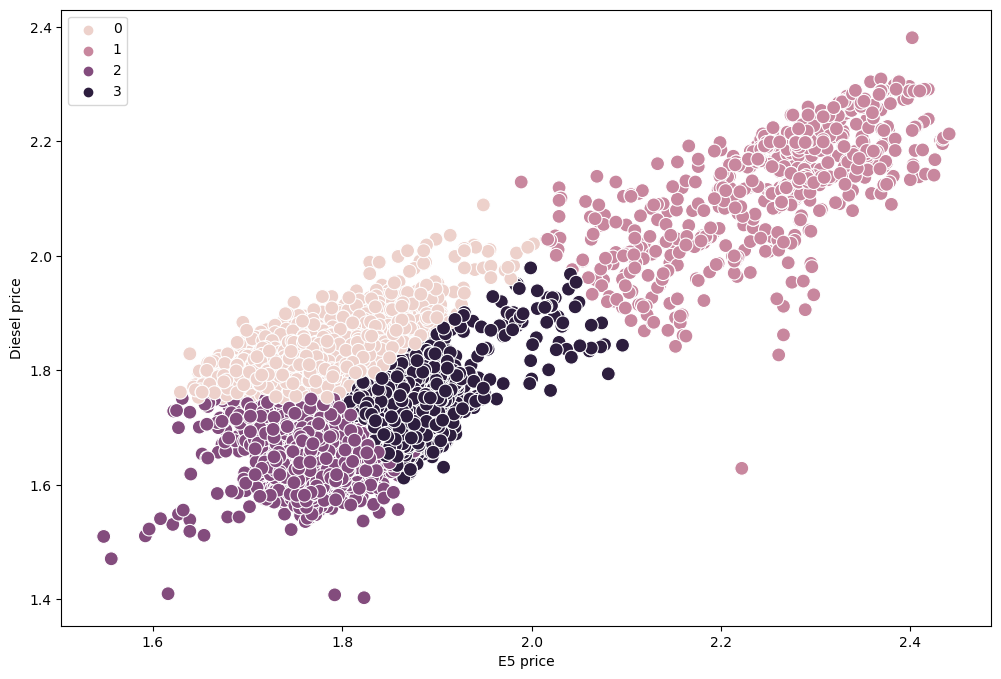

In [47]:
# Plot the clusters for the "e5" and "diesel" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['e5'], y=df_k['diesel'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('E5 price') 
plt.ylabel('Diesel price') 
plt.show()

Since the price for E5 and E10 petrol are similar, there's almost no difference between the two graphs above. 

There might be a large cluster showing a generally upward trend, indicating that as E5/E10 price increases, diesel price also tends to increase. This aligns with the expectation that higher ethanol prices could lead to higher diesel prices.

Scattered data points below the upward trend might represent outliers or exceptions where diesel prices are lower despite higher E5/E10 prices. This could be due to other factors influencing diesel prices in those specific instances.

In [52]:
df_k.loc[df_k['clusters'] == 3, 'cluster'] = 'dark purple'
df_k.loc[df_k['clusters'] == 2, 'cluster'] = 'purple'
df_k.loc[df_k['clusters'] == 1, 'cluster'] = 'pink'
df_k.loc[df_k['clusters'] == 0, 'cluster'] = 'beige'

In [53]:
df_k.groupby('cluster').agg({'e5':['mean', 'median'], 
                         'e10':['mean', 'median'], 
                         'diesel':['mean', 'median']
                          })

e5              e10           diesel       
                 mean median      mean median      mean median
cluster                                                       
beige        1.792105  1.793  1.734219  1.735  1.820176  1.821
dark purple  1.843175  1.841  1.784761  1.782  1.731004  1.733
pink         2.264023  2.275  2.214812  2.222  2.146612  2.169
purple       1.790481  1.792  1.732776  1.734  1.679095  1.683

For future steps, the clusters can be broken down further into sub-clusters, suggesting potential price bands for diesel at different E5/E10 price levels.

Overall, the k-means clustering method did help to reveal grouping patterns in the data. However, interpreting these clusters effectively requires considering the limitations of k-means and the potential influence of other factors beyond E5/E10 price.